In [3]:
import pandas as pd
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

from analysis.utils import optimise_model, plot_variable_importance, load_model, save_model, print_performance_measures

# Predict

In [6]:
df = pd.read_csv('../data/df_simple_model_tw.csv', index_col=0)

y = df["Value"]
X = df.drop("Value", axis=1)

results = pd.DataFrame(index=df.index)

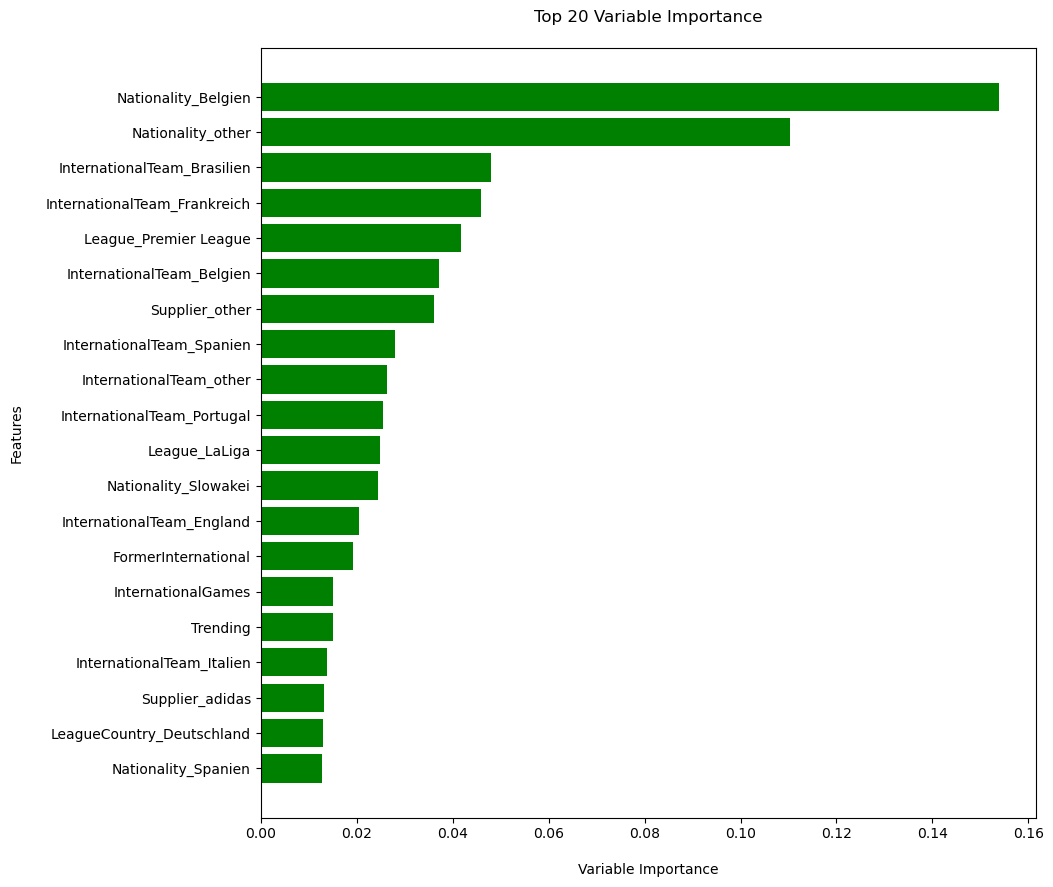

In [7]:
xgb_optimized = load_model('simple-model-xgb-tw')
plot_variable_importance(xgb_optimized, X, n=20)

In [9]:
y_pred_xgb = xgb_optimized.predict(X)
results['PredictedValueSimpleModelXGB'] = y_pred_xgb
print_performance_measures(X, y, y_pred_xgb)

RMSE:		306581.7314
R^2:		0.9942
Adj. R^2:	0.9935


In [10]:
results.to_csv('../data/df_simple_model_tw_results.csv')

# Model Optimisation

In [4]:
df = pd.read_csv('../data/df_simple_model_tw.csv', index_col=0)

y = df["Value"]
X = df.drop("Value", axis=1)

In [5]:
%%timeit -r 1 -n 1

param_dist = {
    "learning_rate": uniform(0.01, 0.5),
    "max_depth": randint(1, 10),
    "n_estimators": randint(50, 500),
    "gamma": uniform(0, 5),
    "subsample": uniform(0.1, 0.9),
    "colsample_bytree": uniform(0.1, 0.9),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}

xgb_optimized, cv_results = optimise_model(XGBRegressor(), param_dist, X, y)

save_model(xgb_optimized, 'simple-model-xgb-tw')

cv_results

Fitting 5 folds for each of 100 candidates, totalling 500 fits
1min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
